# MODELOS
Annette Pamela Ruiz Abreu - A01423595

In [6]:
# Librerías

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import KFold
from sklearn import tree

from IPython.display import Image as PImage
from subprocess import check_call


from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from kneed import KneeLocator

import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [7]:
# Datos
datos = pd.read_excel("Datos Finales/EnjoyersV2.xlsx").drop(columns=["Unnamed: 0.1", "Unnamed: 0"])

In [4]:
datos.head()

Año  Mes  Progreso  Duración  P1.1  P1.2  P1.3  P1.4  P1.5  P1.6  ...  P3  \
0  2021    4       100       207     4     5     4     5     4     5  ...   1   
1  2021    4       100       168     4     4     4     4     2     4  ...   1   
2  2021    4       100       349     4     5     5     5     5     5  ...   1   
3  2021    4       100       245     5     5     5     3     3     5  ...   1   
4  2021    4       100       151     4     3     3     3     4     5  ...   1   

                                 Comentario para OSF  P5.1  P5.2 P5.3  P5.4  \
0  Me gustó mucho la causa a la que se estaba apo...     4     5    5     5   
1  Me gustó el servicio, pero me hubiera gustado ...     4     4    4     4   
2  Muchas gracias por el apoyo y la oportunidad d...     5     5    5     5   
3                ¡Muchas gracias por la experiencia!     5     5    5     5   
4                           Muchas gracias por todo.     4     4    4     4   

                                  Comentario general      Tipo comentario  \
0  Es complicado conseguir colaboraciones en esto...       Reconocimiento   
1  Pues ojalá que ahora sí me valgan mis horas, n...       Reconocimiento   
2  Lo único que me desagrado del servicio fue la ...  Área de oportunidad   
3  Me gusto mucho la experiencia por la apertura ...       Reconocimiento   
4  No sentí que mi trabajo tuviera impacto, fue m...  Área de oportunidad   

                                                 OSF  \
0                                  León Ortigosa ABP   
1                            Comenzar de Nuevo, A.C.   
2                 Casa Paterna La Gran Familia, A.C.   
3  Programa de Acompañamiento de Servicio Social,...   
4  Casa Monarca Ayuda Humanitaria al Migrante A.B.P.   

                                Comentario traducido  
0  It is difficult to get collaborations in these...  
1  Well, I hope that now my hours are worth it, n...  
2  The only thing I disliked about the service wa...  
3  I really liked the experience because of the o...  
4  I did not feel that my work had an impact, it ...  

[5 rows x 23 columns]

### Análisis de sentimiento

In [8]:
# Comenarios vacíos
datos["Comentario traducido"].fillna(".",inplace=True)

In [9]:
sentiment = SentimentIntensityAnalyzer()

datos["sentimiento"] = [sentiment.polarity_scores(datos["Comentario traducido"][i])["compound"] for i in range(10493)]


In [7]:
datos["sentimiento"].unique()


array([ 0.4767,  0.3979, -0.6249, ...,  0.7125,  0.7549,  0.3472])

In [8]:
datos.head()

Año  Mes  Progreso  Duración  P1.1  P1.2  P1.3  P1.4  P1.5  P1.6  ...  \
0  2021    4       100       207     4     5     4     5     4     5  ...   
1  2021    4       100       168     4     4     4     4     2     4  ...   
2  2021    4       100       349     4     5     5     5     5     5  ...   
3  2021    4       100       245     5     5     5     3     3     5  ...   
4  2021    4       100       151     4     3     3     3     4     5  ...   

                                 Comentario para OSF  P5.1  P5.2  P5.3 P5.4  \
0  Me gustó mucho la causa a la que se estaba apo...     4     5     5    5   
1  Me gustó el servicio, pero me hubiera gustado ...     4     4     4    4   
2  Muchas gracias por el apoyo y la oportunidad d...     5     5     5    5   
3                ¡Muchas gracias por la experiencia!     5     5     5    5   
4                           Muchas gracias por todo.     4     4     4    4   

                                  Comentario general      Tipo comentario  \
0  Es complicado conseguir colaboraciones en esto...       Reconocimiento   
1  Pues ojalá que ahora sí me valgan mis horas, n...       Reconocimiento   
2  Lo único que me desagrado del servicio fue la ...  Área de oportunidad   
3  Me gusto mucho la experiencia por la apertura ...       Reconocimiento   
4  No sentí que mi trabajo tuviera impacto, fue m...  Área de oportunidad   

                                                 OSF  \
0                                  León Ortigosa ABP   
1                            Comenzar de Nuevo, A.C.   
2                 Casa Paterna La Gran Familia, A.C.   
3  Programa de Acompañamiento de Servicio Social,...   
4  Casa Monarca Ayuda Humanitaria al Migrante A.B.P.   

                                Comentario traducido sentimiento  
0  It is difficult to get collaborations in these...      0.4767  
1  Well, I hope that now my hours are worth it, n...      0.3979  
2  The only thing I disliked about the service wa...     -0.6249  
3  I really liked the experience because of the o...      0.6697  
4  I did not feel that my work had an impact, it ...      0.0000  

[5 rows x 24 columns]

In [9]:
datos.to_csv("Datos_sentimiento")

In [10]:
print("Comentarios buenos: ",len(datos[datos.sentimiento>0]))
print("Comentarios malos: ",len(datos[datos.sentimiento==0]))
print("Comentarios neutros: ",len(datos[datos.sentimiento<0]))


Comentarios buenos:  7470
Comentarios malos:  2589
Comentarios neutros:  434


In [11]:
pd.DataFrame(datos.columns, columns=["Nombre de columna"])

Nombre de columna
0                    Año
1                    Mes
2               Progreso
3               Duración
4                   P1.1
5                   P1.2
6                   P1.3
7                   P1.4
8                   P1.5
9                   P1.6
10                  P1.7
11                  P1.8
12                    P2
13                    P3
14   Comentario para OSF
15                  P5.1
16                  P5.2
17                  P5.3
18                  P5.4
19    Comentario general
20       Tipo comentario
21                   OSF
22  Comentario traducido
23           sentimiento

In [12]:
datos.shape

(10493, 24)

In [13]:
datos.describe().drop(columns=["Año", "Mes", "Progreso", "Duración"])

P1.1          P1.2          P1.3          P1.4          P1.5  \
count  10493.000000  10493.000000  10493.000000  10493.000000  10493.000000   
mean       4.532831      4.588488      4.561422      4.488897      4.304775   
std        0.738486      0.694533      0.719511      0.834810      0.945490   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        4.000000      4.000000      4.000000      4.000000      4.000000   
50%        5.000000      5.000000      5.000000      5.000000      5.000000   
75%        5.000000      5.000000      5.000000      5.000000      5.000000   
max        5.000000      5.000000      5.000000      5.000000      5.000000   

               P1.6          P1.7          P1.8            P2            P3  \
count  10493.000000  10493.000000  10493.000000  10493.000000  10493.000000   
mean       4.492328      4.473935      4.460974      0.845325      0.985038   
std        0.841104      0.866857      0.839893      0.361611      0.121408   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%        4.000000      4.000000      4.000000      1.000000      1.000000   
50%        5.000000      5.000000      5.000000      1.000000      1.000000   
75%        5.000000      5.000000      5.000000      1.000000      1.000000   
max        5.000000      5.000000      5.000000      1.000000      1.000000   

               P5.1          P5.2          P5.3          P5.4   sentimiento  
count  10493.000000  10493.000000  10493.000000  10493.000000  10493.000000  
mean       4.599638      4.717907      4.723911      4.712761      0.433351  
std        0.701904      0.564130      0.576511      0.588220      0.361921  
min        1.000000      1.000000      1.000000      1.000000     -0.960600  
25%        4.000000      5.000000      5.000000      5.000000      0.000000  
50%        5.000000      5.000000      5.000000      5.000000      0.476700  
75%        5.000000      5.000000      5.000000      5.000000      0.734600  
max        5.000000      5.000000      5.000000      5.000000      0.993100

## NLP

In [14]:
import nltk
from nltk.corpus import cess_esp
import nltk.tokenize
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import es_core_news_sm
nlp = es_core_news_sm.load()

In [15]:
stopword = stopwords.words('english') + ["able", "many", "social", "know", "little", "need", "give", "gave", "continue", "much", "several", "service", "project", "experience"]

In [16]:
# Pasar de lista a string
coment = ""
for i in datos["Comentario traducido"]:
    coment = coment + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(coment)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

In [17]:
counter = Counter(lemmatized)
contador = pd.DataFrame(dict(counter), index=[0]).transpose().reset_index().rename(columns={"index":"Palabra",0:"Repetición"}).sort_values("Repetición", ascending = False).reset_index(drop=True)
tagged_sent = nltk.pos_tag(lemmatized)



In [18]:
counter2 = Counter(tagged_sent)
contador2 = pd.DataFrame(dict(counter2), index=[0]).transpose().reset_index().rename(columns={"level_0":"Palabra","level_1":"Tipo de palabra",0:"Repetición"}).sort_values("Repetición", ascending = False).reset_index(drop=True)
contador2.head()

Palabra Tipo de palabra  Repetición
0   really              RB        1514
1     good              JJ        1312
2   people             NNS        1062
3    liked             VBD        1045
4  student              NN         775

In [19]:
c = contador2[(contador2["Tipo de palabra"]=="JJ")|(contador2["Tipo de palabra"]=="VB")|(contador2["Tipo de palabra"]=="VBD")|(contador2["Tipo de palabra"]=="VBG")|(contador2["Tipo de palabra"]=="VBN")|(contador2["Tipo de palabra"]=="VBP")|(contador2["Tipo de palabra"]=="VBZ")]
c = pd.DataFrame(c.groupby(by="Palabra")["Repetición"].sum()).sort_values("Repetición", ascending=False)
c.head(15)


Repetición
Palabra                
liked              2155
good               1324
interesting         621
learned             537
great               453
loved               451
different           407
think               379
learning            369
helped              336
make                307
made                306
learn               301
new                 277
important           273

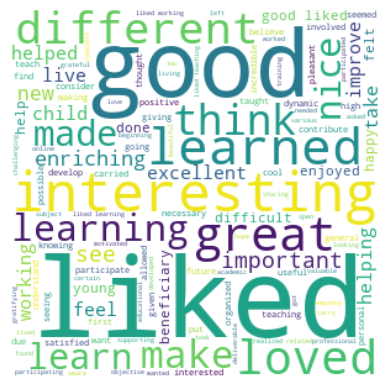

In [20]:
s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()


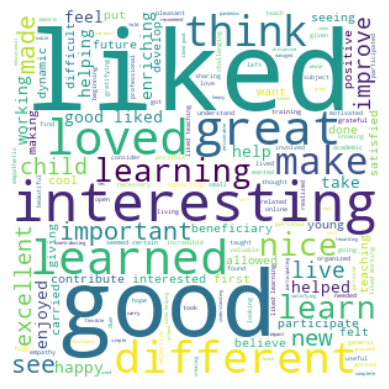

In [21]:
buenos = datos[datos.sentimiento>0]["Comentario traducido"]
# Pasar de lista a string
coments_buenos = ""
for i in buenos:
    coments_buenos = coments_buenos + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(coments_buenos)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()



In [22]:
malos = datos[datos.sentimiento<0]["Comentario traducido"]


In [23]:
stopword_malos = stopword + ["good", "liked", "learn", "learned"]

In [24]:
# Pasar de lista a string
coments_malos = ""
for i in malos:
    coments_malos = coments_malos + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(coments_malos)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword_malos]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

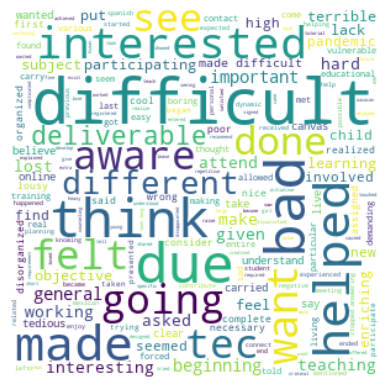

In [25]:
s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()

## Regresión lineal

Se intentará predecir la columna P1.1 que pregunta sobre qué tan satisfecho está el alumno

In [26]:
X = datos.drop(columns=["Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido"])
Y = datos["P1.1"]


In [27]:
label_encoder = LabelEncoder()
labels = {}

X["Tipo comentario"] = label_encoder.fit_transform(datos["Tipo comentario"])

X.head()



Año  Mes  P1.2  P1.3  P1.4  P1.5  P1.6  P1.7  P1.8  P2  P3  P5.1  P5.2  \
0  2021    4     5     4     5     4     5     5     5   1   1     4     5   
1  2021    4     4     4     4     2     4     4     1   1   1     4     4   
2  2021    4     5     5     5     5     5     5     4   1   1     5     5   
3  2021    4     5     5     3     3     5     5     5   1   1     5     5   
4  2021    4     3     3     3     4     5     5     2   1   1     4     4   

   P5.3  P5.4  Tipo comentario  sentimiento  
0     5     5                0       0.4767  
1     4     4                0       0.3979  
2     5     5                1      -0.6249  
3     5     5                0       0.6697  
4     4     4                1       0.0000

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=9)

In [28]:
# Create an instance of the Linear Regression model
reg = LinearRegression()

# Fit the data to the Linear Regression model (train the model)
reg.fit(X_train,Y_train)


: 

: 

In [ ]:
pd.DataFrame(reg.coef_, index=X.columns, columns =["Coeficients"])

Coeficients
Año                 0.026735
Mes                 0.002097
P1.2                0.331741
P1.3                0.149097
P1.4                0.089887
P1.5                0.009675
P1.6                0.217727
P1.7                0.073095
P1.8                0.043044
P2                 -0.003587
P3                  0.036181
P5.1                0.002266
P5.2                0.010516
P5.3                0.009010
P5.4                0.005593
Tipo comentario    -0.012480
sentimiento         0.048174

In [ ]:
pd.DataFrame([reg.intercept_], columns =["Intercept"])

Intercept
0 -53.854358

In [ ]:
predictions = reg.predict(X_test)

In [ ]:
test_rmse = np.sqrt(mean_squared_error(Y_test,predictions))

# Determination coeficient (R2)
test_r2sc = r2_score(Y_test, predictions)

# Remember the lower the value is the better it is
print("Square root of the mean squared error",test_rmse)


# The closer to 1 the better
print("Determination Coeficient",test_r2sc)

Square root of the mean squared error 0.3853370606632636
Determination Coeficient 0.7253303788363983


In [ ]:
print(f"Accuracy on test set: {round(reg.score(X_test,Y_test),2)}")

Accuracy on test set: 0.73


In [ ]:
print(predictions)

[3.91854127 4.7882076  3.99914642 ... 4.95471465 4.99902516 4.712097  ]


In [ ]:
import statsmodels.api as sm
import pandas as pd



# Agregar una constante a la matriz de variables independientes
X = sm.add_constant(X_train)

# Ajustar el modelo de regresión lineal
model = sm.OLS(Y_train, X).fit()

# Obtener los coeficientes de regresión
coefficients = model.params

# Imprimir los coeficientes y su significancia estadística
pesos = {}
for i, variable in enumerate(X.columns):
    pesos[variable] = model.pvalues[i]
    #print(f'Variable: {variable}, Coeficiente: {coefficients[i]}, P-valor: {model.pvalues[i]}')


pesos_df = pd.DataFrame(pesos, index=[0]).transpose().rename(columns={0:"Peso"}).sort_values("Peso", ascending=False)
pesos_df


Peso
P5.1              7.956421e-01
P2                7.818622e-01
P5.4              6.394875e-01
P5.3              4.469760e-01
P5.2              4.341713e-01
P3                3.206309e-01
Mes               1.560853e-01
P1.5              9.088606e-02
Tipo comentario   6.675547e-02
sentimiento       3.308448e-04
const             1.448200e-04
Año               1.360267e-04
P1.8              1.823216e-08
P1.7              5.821755e-14
P1.4              7.519301e-29
P1.3              3.978779e-56
P1.6              4.923581e-96
P1.2             1.336071e-216

## Árboles de decisión

In [29]:
# Búsqueda del mejor árbol de decisión

cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(datos))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(datos):
        f_train = datos.loc[train_fold] 
        f_valid = datos.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(["Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"], axis=1), 
                               y = f_train["P1.1"]) 
        valid_acc = model.score(X = f_valid.drop(["Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"], axis=1), 
                                y = f_valid["P1.1"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))


 Max Depth  Average Accuracy
         1          0.805598
         2          0.818368
         3          0.822942
         4          0.824180
         5          0.828564
         6          0.828278
         7          0.824466
         8          0.824084
         9          0.822463
        10          0.820747
        11          0.814361
        12          0.811788
        13          0.809882
        14          0.810359
        15          0.809120
        16          0.808834
        17          0.808929
        18          0.808358
        19          0.807882
        20          0.808358
        21          0.807214
        22          0.807882
        23          0.807500
        24          0.807500


In [30]:
print("Max Depth Elegido: ",df["Max Depth"][df["Average Accuracy"] == df["Average Accuracy"].max()].values)

Max Depth Elegido:  [5]


In [32]:
# Creación del árbol de decisión
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y = datos['P1.1'].values 
x = datos.drop(["Duración","P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"], axis=1).values 


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=9)


# Crear Arbol de decision con profundidad = 6
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 6,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 6,
                              impurity = True,
                              feature_names = list(datos.drop(["Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"], axis=1)),
                              # class_names = ['No', 'N1 Billboard'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
import subprocess
from PIL import Image

# ...

# Convertir el archivo .dot a .png
subprocess.run(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png'], check=True)

# Mostrar la imagen
image = Image.open('tree1.png')
image.show()



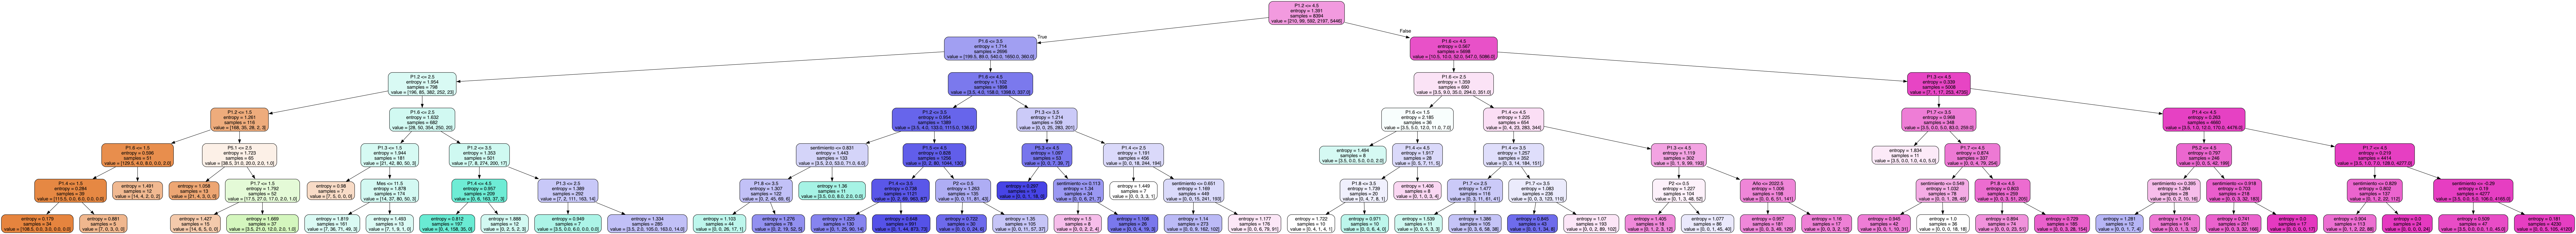

In [33]:
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

In [34]:
# Precisión
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print("Accuracy:",acc_decision_tree)

Accuracy: 84.14


In [35]:
y_pred = decision_tree.predict(x_test)



In [36]:
reporte = classification_report(y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

           1       0.62      0.62      0.62        21
           2       0.40      0.20      0.27        20
           3       0.52      0.50      0.51       120
           4       0.77      0.72      0.74       600
           5       0.90      0.93      0.92      1338

    accuracy                           0.84      2099
   macro avg       0.64      0.59      0.61      2099
weighted avg       0.83      0.84      0.83      2099



In [37]:
C = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[1, 2, 3, 4, 5], columns=[1, 2, 3, 4, 5])
print("Matriz de confusión\n")
display(C)
display(C / C.astype(np.float).sum(axis=0))


Matriz de confusión



1  2   3    4     5
1  13  2   6    0     0
2   2  4  12    2     0
3   5  2  60   47     6
4   1  1  32  432   134
5   0  1   5   82  1250

1    2         3         4         5
1  0.619048  0.2  0.052174  0.000000  0.000000
2  0.095238  0.4  0.104348  0.003552  0.000000
3  0.238095  0.2  0.521739  0.083481  0.004317
4  0.047619  0.1  0.278261  0.767318  0.096403
5  0.000000  0.1  0.043478  0.145648  0.899281

## SVM

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

datos_SVM = pd.read_excel("Datos Finales/EnjoyersV2.xlsx").drop(columns=["Unnamed: 0.1", "Unnamed: 0"])
datos_SVM
n = len(datos_SVM)

In [39]:
datos_SVM['Tipo comentario'].replace({'Reconocimiento':1, 'Área de oportunidad':0}, inplace=True)
datos2 = datos_SVM.groupby('OSF')['Tipo comentario'].mean()
dic_promedio_tc = {}
lista_OSF = datos2.index
contador=0
for u in lista_OSF:
    dic_promedio_tc[u] = datos2[contador]
    contador+=1

datos_SVM['Comentario traducido'].fillna(' ', inplace=True)
sentiment = SentimentIntensityAnalyzer()
datos_SVM["sentimiento"] = [sentiment.polarity_scores(datos_SVM["Comentario traducido"][i])["compound"] for i in range(n)]


In [40]:
# Aqui estamos iterando entre las filas del dataset para ver si contiene valores nulos y llenarlos con la media del tipo de comentario
for u in range(n):
    if(pd.isna(datos_SVM['Tipo comentario'][u])==True):
        Org = datos_SVM['OSF'][u]
        if(dic_promedio_tc[Org] >=0):
            datos_SVM['Tipo comentario'][u] = round(dic_promedio_tc[Org])
            # Nos fijamos en la satisfacción del usuario para llenar el tipo de comentario si estaba vacío la media
        elif(pd.isna(dic_promedio_tc[Org]) == True and datos_SVM['P1.1'][u] >= 4):
            datos_SVM['Tipo comentario'][u] = 1.0


In [41]:
# Hacemos el modelo:
X = datos_SVM[['P1.1','P1.2', 'P1.3','P1.4', 'P1.5', 'P1.6', 'P1.7', 'P1.8', 'P2', 'P3', 'P5.1', 'P5.2', 'P5.3', 'P5.4', 'sentimiento']]
y =datos_SVM['Tipo comentario']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=73)
svc_modelo = SVC()
svc_modelo.fit(X_train, y_train)
y_pred = svc_modelo.predict(X_test)

In [42]:
# Calculamos la precision
precision = accuracy_score(y_test, y_pred)
print("Accuracy:", precision)

# Generamos un reporte
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.7894235350166746
Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.22      0.33       484
         1.0       0.80      0.96      0.88      1615

    accuracy                           0.79      2099
   macro avg       0.71      0.59      0.60      2099
weighted avg       0.76      0.79      0.75      2099



## DBSCAN

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
import itertools
import numpy as np
epsilons = np.linspace(0.01, 1, num=15)
min_samples = np.arange(2,20,step=3)
combinations = list(itertools.product(epsilons,min_samples))
N = len(combinations)
X = datos_SVM[['sentimiento']].values

In [44]:
# Función que busca los paramétros más adecuados para hacer el modelo
def get_scores_and_labels(combinations, X):
    scores= []
    all_labels_list= []
    for i, (eps, num_samples) in enumerate(combinations):
        dbscan_cluster_model=DBSCAN(eps=eps, min_samples=num_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if(-1 in labels_set):
            num_clusters -=1
        if(num_clusters < 2 or num_clusters > 50):
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps,num_samples)
            print(f'Combination{c} on iteration {i+1} of {N} has {num_clusters}. Moving on')
            continue
            
        scores.append(ss(X, labels))
        all_labels_list.append(labels)

        print(f'Index:{i}, Score:{scores[-1]}, Labels:{all_labels_list[-1]}, Num_clusters:{num_clusters}')

        best_index=np.argmax(scores)
        best_parameters= combinations[best_index]
        best_labels =all_labels_list[best_index]
        best_score = scores[best_index]

        return {'best_epsilon':best_parameters[0],
                'best_min_samples':best_parameters[1],
                'best_labels': best_labels,
                'best_score': best_score}

best_dict = get_scores_and_labels(combinations=combinations, X=X)

Index:0, Score:0.6497705871569414, Labels:[0 0 1 ... 0 0 2], Num_clusters:22


## Naive Bayes

## K-means

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [46]:
X = np.array(datos.drop(columns=["Año", "Mes", "Duración", "P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"]))
y = np.array(datos["P1.1"])
X.shape

(10493, 14)

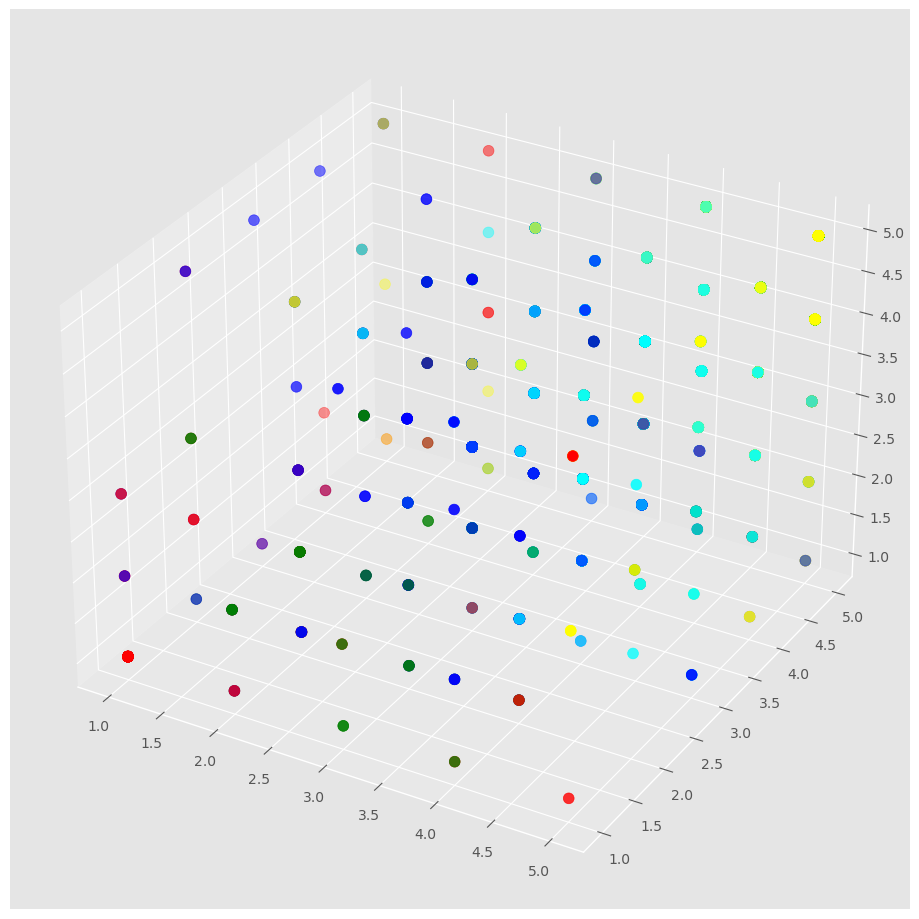

In [47]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)


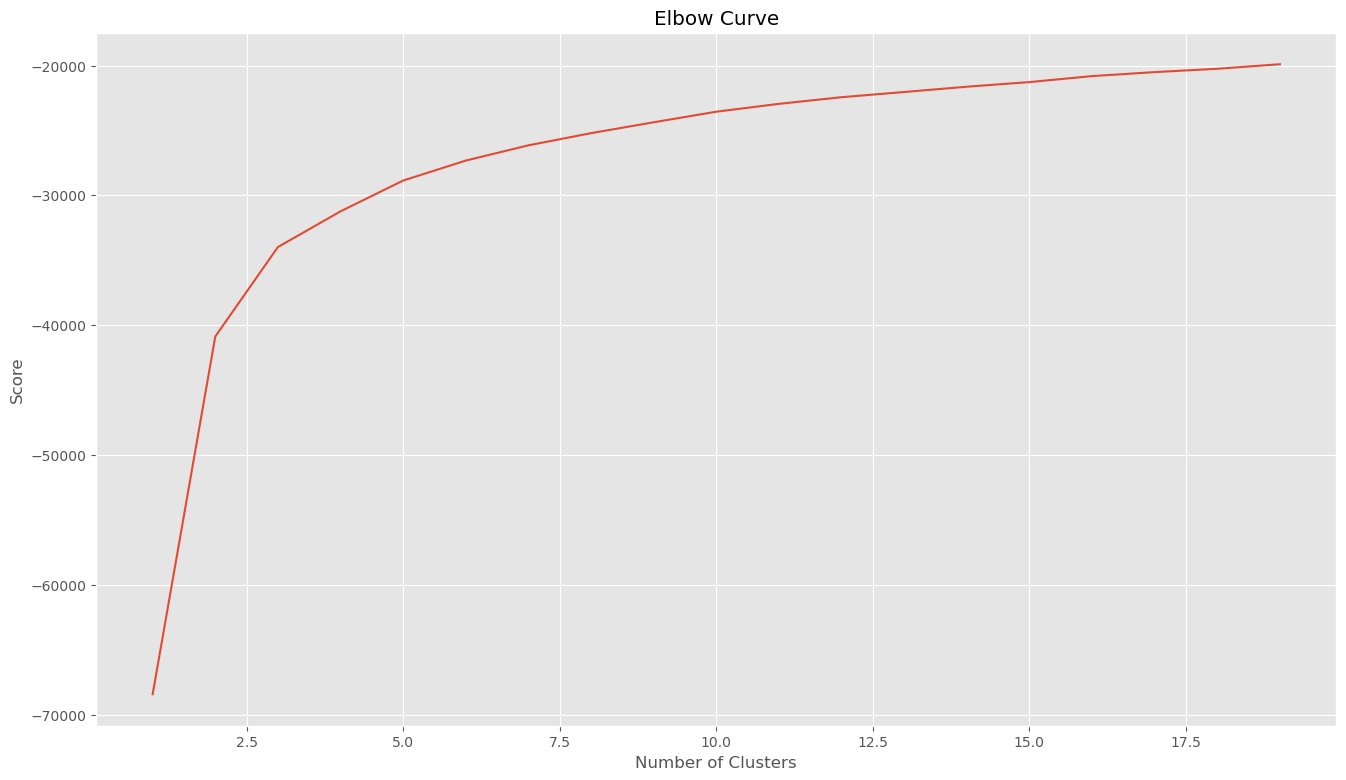

In [48]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [49]:
score[4]

-28857.471593442817

In [50]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[4.73420195 4.6781759  4.64560261 3.42084691 4.77003257 4.74006515
  4.44234528 0.88729642 0.99869707 4.68078176 4.86254072 4.86775244
  4.85732899 0.48311765]
 [4.0291616  3.99878493 3.90886999 3.75151883 4.00060753 3.98663426
  3.9653706  0.80801944 0.98116646 3.83232078 4.04434994 4.04860267
  4.01215067 0.37066361]
 [2.85904762 2.8952381  2.45714286 2.65714286 2.33142857 2.29333333
  2.67428571 0.42666667 0.81333333 3.30857143 3.51619048 3.58095238
  3.49333333 0.13940305]
 [4.14887892 4.07443946 3.81704036 3.83766816 3.50313901 3.41165919
  3.63497758 0.63318386 0.98475336 4.76681614 4.87892377 4.91928251
  4.90313901 0.37925256]
 [4.95786319 4.9430536  4.93494358 4.94887165 4.95433709 4.95398449
  4.93758815 0.92524683 0.99841326 4.88698872 4.95380818 4.94834274
  4.95239774 0.4759176 ]]


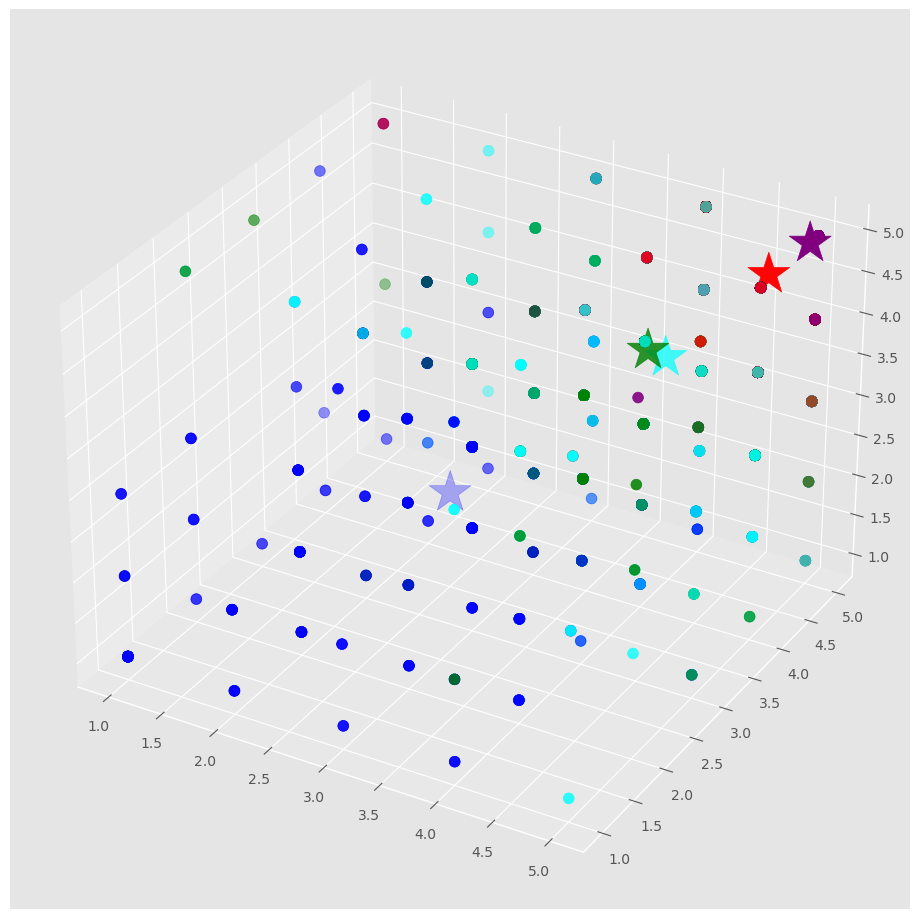

In [51]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue', 'cyan', 'purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [52]:
copy =  pd.DataFrame()
copy['OSF']=datos['OSF'].values
copy['categoria']=datos['P1.1'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cluster']=["grupo1", "grupo2", "grupo3", "group4", "group5"]
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

cluster  cantidad
0  grupo1      1535
1  grupo2      1646
2  grupo3       525
3  group4      1115
4  group5      5672

In [53]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo.drop(index=[0, 1, 2], inplace=True)

In [54]:
diversidadGrupo

categoria  cantidad
3          3      26.0
4          4     425.0
5          5    1084.0

In [55]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([1170,  524, 4246, 1305,   86])

In [56]:
print("REPRESENTANTES DE CADA CLUSTER")
users=datos['OSF'].values
for row in closest:
    print(users[row])

REPRESENTANTES DE CADA CLUSTER
Dirección de Servicio Social
CONAFE, Consejo Nacional de Fomento Educativo
CIES, Centro de Investigación y Educación para la Salud, A.C.
Dirección de Servicio Social
Viccali, Vida con Calidad, A.C.


In [57]:
for i in closest:
    display(pd.DataFrame(datos.iloc[i]))

1170
Año                                                                2021
Mes                                                                   7
Progreso                                                            100
Duración                                                            211
P1.1                                                                  5
P1.2                                                                  5
P1.3                                                                  5
P1.4                                                                  5
P1.5                                                                  3
P1.6                                                                  5
P1.7                                                                  5
P1.8                                                                  4
P2                                                                    1
P3                                                                    1
Comentario para OSF   Creo que en caso de que quieran realizar el pr...
P5.1                                                                  5
P5.2                                                                  5
P5.3                                                                  5
P5.4                                                                  5
Comentario general    Fue muy interesante y educativo para poder for...
Tipo comentario                                          Reconocimiento
OSF                                        Dirección de Servicio Social
Comentario traducido  It was very interesting and educational to be ...
sentimiento                                                      0.4576

524
Año                                                                2021
Mes                                                                   6
Progreso                                                            100
Duración                                                             87
P1.1                                                                  4
P1.2                                                                  4
P1.3                                                                  4
P1.4                                                                  4
P1.5                                                                  4
P1.6                                                                  4
P1.7                                                                  4
P1.8                                                                  4
P2                                                                    1
P3                                                                    1
Comentario para OSF     Me gusto mucho, pero fueron muchos entregables 
P5.1                                                                  4
P5.2                                                                  4
P5.3                                                                  4
P5.4                                                                  4
Comentario general     Estuvo padre, pero te piden muchos entregables. 
Tipo comentario                                     Área de oportunidad
OSF                       CONAFE, Consejo Nacional de Fomento Educativo
Comentario traducido  It was great, but they ask you for many delive...
sentimiento                                                      0.3716

4246
Año                                                                2021
Mes                                                                  12
Progreso                                                            100
Duración                                                           2485
P1.1                                                                  3
P1.2                                                                  3
P1.3                                                                  3
P1.4                                                                  2
P1.5                                                                  3
P1.6                                                                  3
P1.7                                                                  3
P1.8                                                                  3
P2                                                                    0
P3                                                                    1
Comentario para OSF   No había mucho enfoque de los proyectos a real...
P5.1                                                                  3
P5.2                                                                  3
P5.3                                                                  3
P5.4                                                                  3
Comentario general           No sentí que el proyecto estaba organizado
Tipo comentario                                     Área de oportunidad
OSF                   CIES, Centro de Investigación y Educación para...
Comentario traducido      I did not feel that the project was organized
sentimiento                                                         0.0

1305
Año                                                                2021
Mes                                                                   7
Progreso                                                            100
Duración                                                            147
P1.1                                                                  4
P1.2                                                                  4
P1.3                                                                  4
P1.4                                                                  4
P1.5                                                                  4
P1.6                                                                  4
P1.7                                                                  3
P1.8                                                                  4
P2                                                                    1
P3                                                                    1
Comentario para OSF   Es muy dificil con el compromiso de algunos es...
P5.1                                                                  5
P5.2                                                                  5
P5.3                                                                  5
P5.4                                                                  5
Comentario general    Es primera vez que soy profesor y me siento fe...
Tipo comentario                                          Reconocimiento
OSF                                        Dirección de Servicio Social
Comentario traducido  It is the first time that I am a teacher and I...
sentimiento                                                      0.5719

86
Año                                                               2021
Mes                                                                  4
Progreso                                                           100
Duración                                                           161
P1.1                                                                 5
P1.2                                                                 5
P1.3                                                                 5
P1.4                                                                 5
P1.5                                                                 5
P1.6                                                                 5
P1.7                                                                 5
P1.8                                                                 5
P2                                                                   1
P3                                                                   1
Comentario para OSF                                 Muy padre dinamica
P5.1                                                                 5
P5.2                                                                 5
P5.3                                                                 5
P5.4                                                                 5
Comentario general    Me gustaron mucho los temas que fueron abordados
Tipo comentario                                         Reconocimiento
OSF                                    Viccali, Vida con Calidad, A.C.
Comentario traducido      I really liked the topics that were covered.
sentimiento                                                     0.4754

In [58]:
X_new = np.array([[5, 5, 2, 4, 3, 4, 4, 0, 1, 1, 1, 1, 1, 0.7]])
new_labels = kmeans.predict(X_new)
print(new_labels)


[2]


## K-means comment clustering

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [11]:
# Clustering using TfidfVectorizer method
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(datos["Comentario traducido"])
tf_idf_array = tf_idf.toarray()

In [12]:
kmeans = KMeans(n_clusters=3, algorithm = 'auto') 
kmeans.fit(tf_idf_array)
KMeans(n_clusters=3)
cluster_assignment = kmeans.labels_
clustered_sentences = [[] for i in range(3)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(datos["Comentario traducido"][sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['It is difficult to get collaborations in these times of pandemic, but this service taught me and helped improve my way of communicating with businesses and working as a team', "Well, I hope that now my hours are worth it, not like last semester when I did a whole semester and they didn't give me a measly hour, I don't like them", 'The only thing I disliked about the service was the lack of collaboration from my teammates, since they rarely attended meetings with the training partner, did not participate in the development of the challenge, and did not complete their parts of the job on time.\nIt saddened me to see the lack of motivation and empathy from my colleagues when working for a social cause. I truly believe that something should be done about it.', 'I did not feel that my work had an impact, it was very little that I did.', 'It is a project that sometimes requires work and dedication, but it is an experience that helps develop your social skills and your role in th

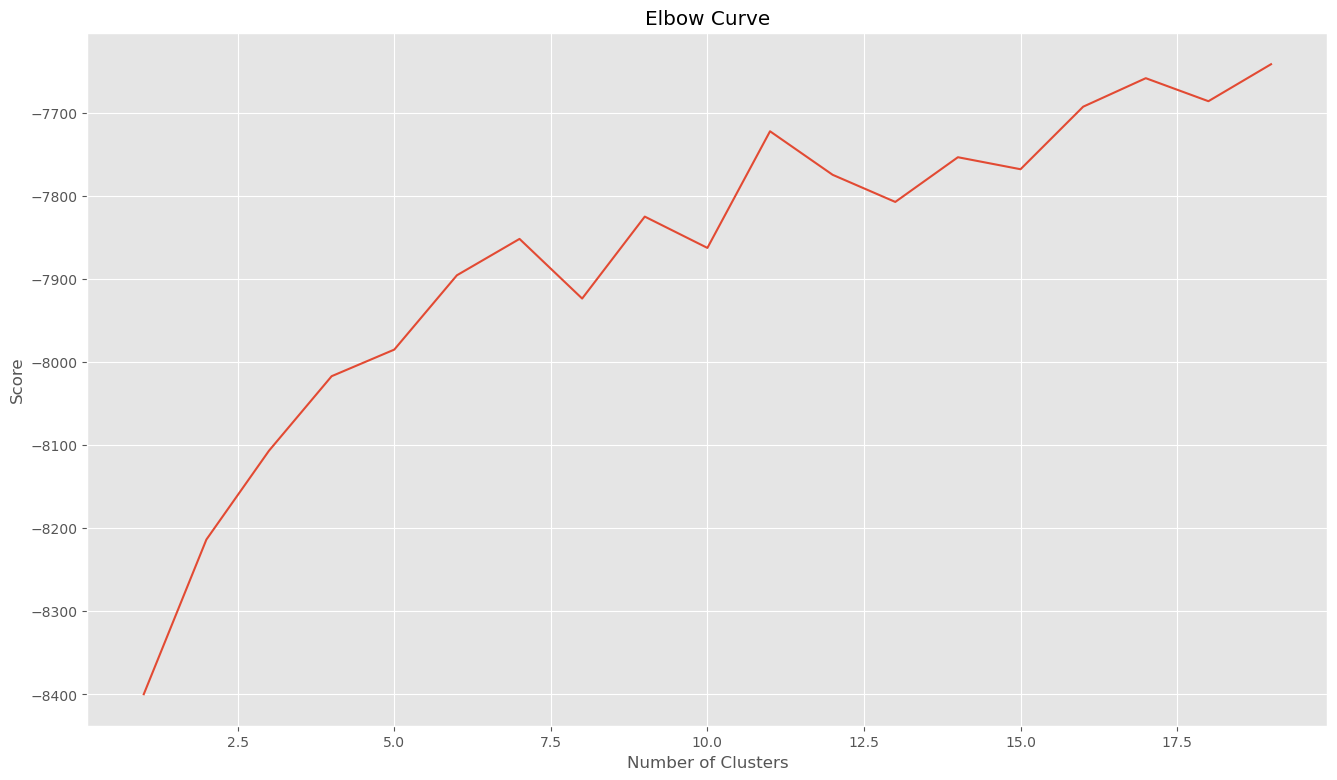

In [13]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(tf_idf_array).score(tf_idf_array) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [80]:
clustered_sentences_df = pd.DataFrame()
clustered_sentences_df["cluster"] = range(1, 4)
clustered_sentences_df["cantidad"] = 0
for i in range(3):
    clustered_sentences_df["cantidad"][i] = len(clustered_sentences[i])

clustered_sentences_df


cluster  cantidad
0        1       546
1        2      1600
2        3      8347

In [81]:
sentiment_values = []
for y in range(3):
    sentiment_values_y = [sentiment.polarity_scores(i)["compound"] for i in clustered_sentences[y]]
    sentiment_values.append(sentiment_values_y)

clustered_sentences_df["sentimiento promedio"] = 0
clustered_sentences_df["length promedio"] = 0
a = -1
for i in clustered_sentences:
    suma = 0
    s = 0
    c = 0
    a+=1
    for y in i:
        s += len(y)
        suma += sentiment.polarity_scores(y)["compound"]
        c += 1
    promedio = suma/c
    p = s/c
    clustered_sentences_df["sentimiento promedio"][a] = promedio
    clustered_sentences_df["length promedio"][a] = p

clustered_sentences_df

cluster  cantidad  sentimiento promedio  length promedio
0        1       546              0.554455        31.430403
1        2      1600              0.621348       106.106250
2        3      8347              0.389393       104.473104

In [63]:
kmeans = KMeans(n_clusters=5, algorithm = 'auto') 
kmeans.fit(tf_idf_array)
KMeans(n_clusters=5)
cluster_assignment = kmeans.labels_
clustered_sentences = [[] for i in range(5)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(datos["Comentario traducido"][sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['I loved compassion to other people', 'I loved it', 'I loved it.', 'I loved the service, I will put it back', 'The service was excellent, I loved it', 'I loved it very much', 'I loved all the projects we did with the organization', 'I loved it.', 'I loved everything we did during this service :-)', 'I loved being able to live so much with the beneficiaries!!', 'I loved it', 'I loved it', 'I loved learning about social networks', 'I loved it.', 'I loved it', 'I loved the experience', 'I loved it', 'I loved', 'I loved', 'I loved it', 'I loved', 'I loved being part of this organization!', 'I loved the social service.', 'I loved!!', 'I loved teaching', 'Great!! I would have loved in person', 'I loved it', 'I loved it', 'I loved the idea of \u200b\u200bsocial service and the project.', 'I loved it', 'I loved the experience!', 'I loved', 'I loved it!', 'I loved learning about the culture', 'I loved', 'I loved !!', 'I loved it', 'I loved it', 'I loved working with my colleagues', 

In [64]:
clustered_sentences_df = pd.DataFrame()
clustered_sentences_df["cluster"] = range(1,6)
clustered_sentences_df["cantidad"] = 0
for i in range(5):
    clustered_sentences_df["cantidad"][i] = len(clustered_sentences[i])

clustered_sentences_df



cluster  cantidad
0        1       147
1        2       309
2        3      1147
3        4      7378
4        5      1512

In [65]:
sentiment_values = []
for y in range(5):
    sentiment_values_y = [sentiment.polarity_scores(i)["compound"] for i in clustered_sentences[y]]
    sentiment_values.append(sentiment_values_y)

In [66]:
clustered_sentences_df["promedio sentimiento"] = 0
clustered_sentences_df["length promedio"] = 0
a = -1
for i in clustered_sentences:
    suma = 0
    s = 0
    c = 0
    a+=1
    for y in i:
        s += len(y)
        suma += sentiment.polarity_scores(y)["compound"]
        c += 1
    promedio = suma/c
    p = s/c
    clustered_sentences_df["promedio sentimiento"][a] = promedio
    clustered_sentences_df["length promedio"][a] = p


In [67]:
clustered_sentences_df

cluster  cantidad  promedio sentimiento  length promedio
0        1       147              0.630337        19.795918
1        2       309              0.507489        22.038835
2        3      1147              0.565459       112.240628
3        4      7378              0.366922       102.950122
4        5      1512              0.622981       106.443122

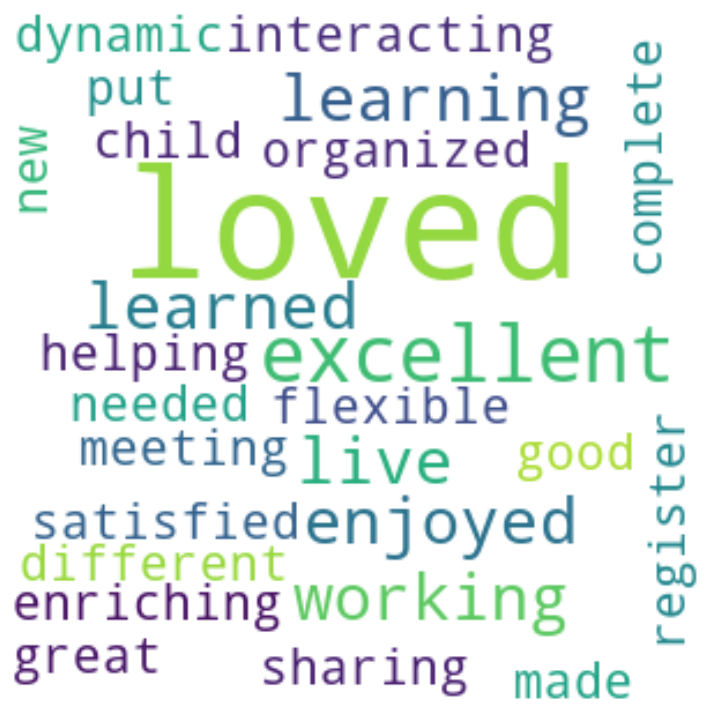

In [68]:
# CLUSTER 1

# Pasar de lista a string
cluster = ""
for i in clustered_sentences[0]:
    cluster = cluster + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(cluster)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()

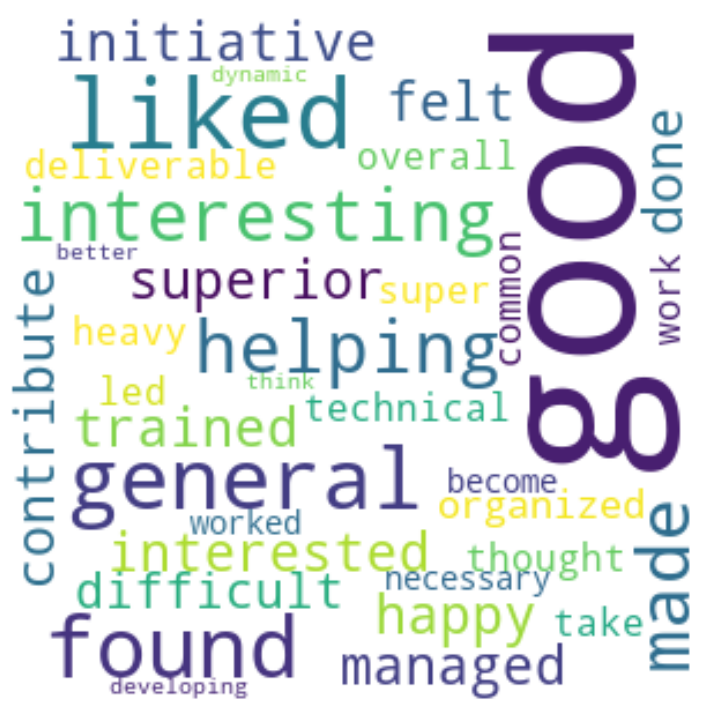

In [69]:
# CLUSTER 2

# Pasar de lista a string
cluster = ""
for i in clustered_sentences[1]:
    cluster = cluster + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(cluster)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()

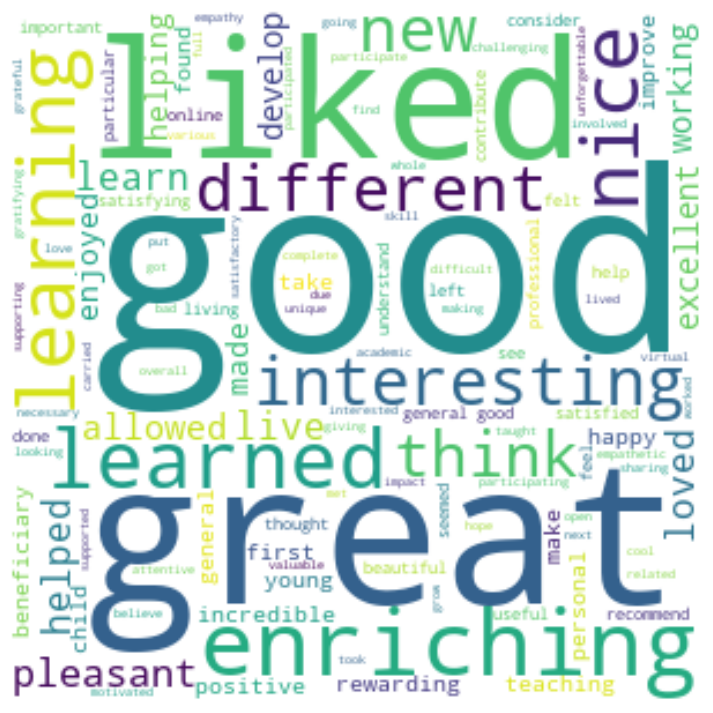

In [70]:
# CLUSTER 3

# Pasar de lista a string
cluster = ""
for i in clustered_sentences[2]:
    cluster = cluster + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(cluster)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()

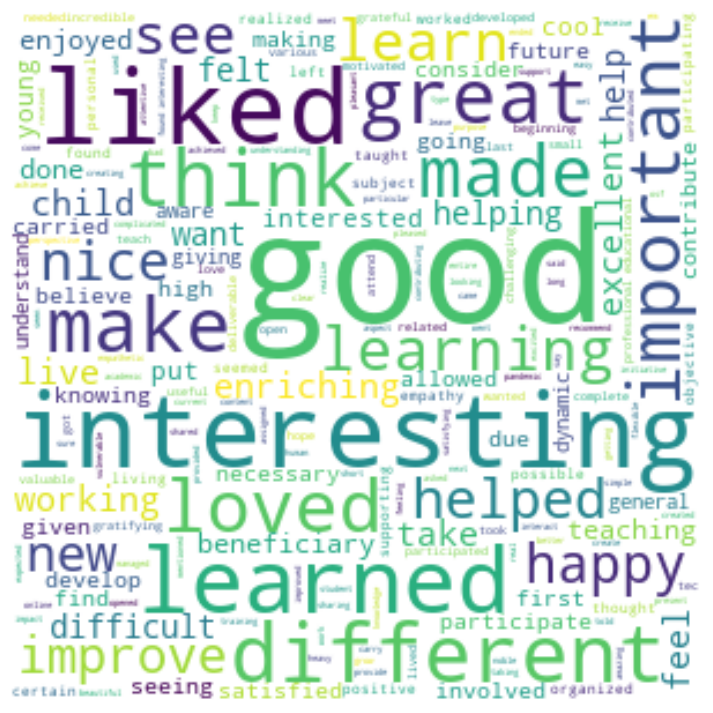

In [71]:
# CLUSTER 4

# Pasar de lista a string
cluster = ""
for i in clustered_sentences[3]:
    cluster = cluster + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(cluster)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()

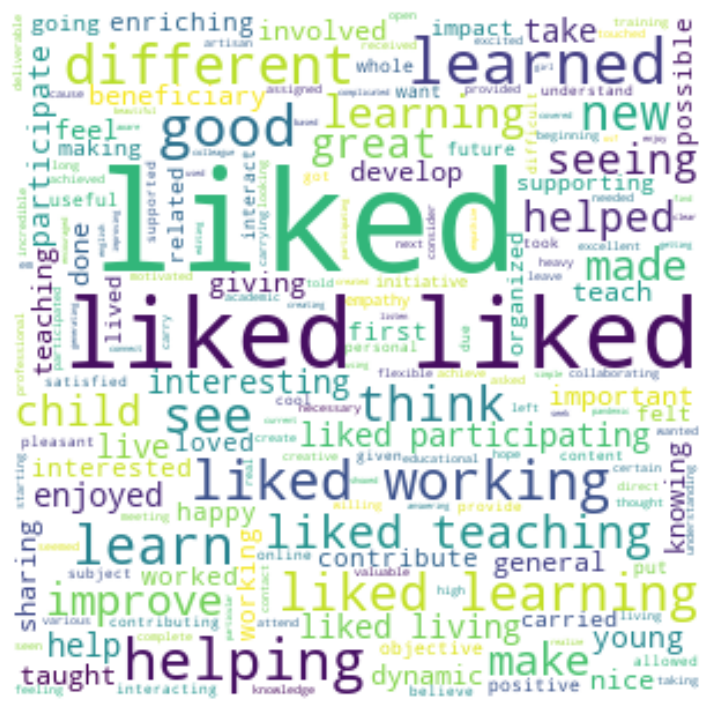

In [72]:
# CLUSTER 5

# Pasar de lista a string
cluster = ""
for i in clustered_sentences[4]:
    cluster = cluster + i + "\n"
    
# Preparación para NLP de Comentario para OSF
tokenized = word_tokenize(cluster)
tokenized_words = [i.lower() for i in tokenized if (i.isalpha() and len(i)>2)]

no_stopwords = [i for i in tokenized_words if i not in stopword]

# "normalizar" palabras
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(i) for i in no_stopwords]

tagged_sent = nltk.pos_tag(lemmatized)

s = ""
for i in tagged_sent:
    if ((i[1]=="JJ") | (i[1]=="VB") | (i[1]=="VBD") | (i[1]=="VBG") | (i[1]=="VBN") | (i[1]=="VBP")):
        s+=i[0]+" "

from wordcloud import WordCloud

wc = WordCloud(width = 300, height = 300, background_color = "white").generate(s)

# Eliminar los ejes y mostrar los datos como imagen
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()

## PCA

In [82]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [1]:
d = datos.drop(columns=["Año", "Mes", "Duración","P1.1", "Progreso", "Comentario para OSF", "Comentario general", "OSF", "Comentario traducido", "Tipo comentario"])

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(d)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

NameError: name 'datos' is not defined